# **Project Title: Machine Learning-Based Intrusion Detection(cont.....)**

#### **Team Members**: Haifa Muhammad, Raghad Alamoudi, Amani Albarazi & Maram Alhusami

##### **Course**: CS 4082- Machine Learning

##### **Supervised by**: Dr.Naila Marir

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [9]:
Backdoor_Malware_dataset = pd.read_csv('Backdoor_Malware.pcap.csv')
Backdoor_Malware_dataset.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
0,13.2,17,111.8,21.654112,0.0,0.0,0.0,0.0,0.3,0.0,...,0.9,2105,60,1392,210.5,415.549502,210.5,0.046181,10,172681.388889
1,11.2,17,63.5,134.621809,0.0,0.1,0.0,0.0,0.0,0.0,...,1.0,4736,60,1392,473.6,632.696206,473.6,0.008186,10,400304.488889
2,13.6,17,65.6,211.662495,0.0,0.1,0.0,0.0,0.2,0.0,...,1.0,3788,62,1392,378.8,508.763381,378.8,0.004735,10,258840.177778
3,24.8,6,84.4,155.707333,0.0,0.0,0.0,0.4,0.7,0.0,...,1.0,2917,62,833,291.7,308.737951,291.7,0.006422,10,95319.122222
4,10.4,17,118.3,105.440687,0.0,0.0,0.0,0.0,0.1,0.0,...,1.0,1163,62,230,116.3,75.052648,116.3,0.009484,10,5632.900000


In [10]:
Backdoor_Malware_dataset.isnull().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [11]:
DDoS_TCP_dataset = pd.read_csv('DDoS-TCP_Flood.pcap.csv')
DDoS_TCP_dataset.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
0,20.00,6,64.00,19616.050884,0.00,0.0,0.0,0.00,0.00,0.0,...,1.0,6000,60,60,60.00,0.000000,60.00,0.000051,100,0.000000
1,20.00,6,64.00,24102.425009,0.00,0.0,0.0,0.00,0.00,0.0,...,1.0,6000,60,60,60.00,0.000000,60.00,0.000041,100,0.000000
2,20.00,6,64.00,109511.853786,0.00,0.0,0.0,0.00,0.00,0.0,...,1.0,6000,60,60,60.00,0.000000,60.00,0.000009,100,0.000000
3,20.36,6,63.54,15453.756310,0.01,0.0,0.0,0.01,0.03,0.0,...,1.0,6025,60,73,60.25,1.539874,60.25,0.000065,100,2.371212
4,20.00,6,64.00,87875.633773,0.00,0.0,0.0,0.00,0.00,0.0,...,1.0,6000,60,60,60.00,0.000000,60.00,0.000011,100,0.000000


In [12]:
DDoS_TCP_dataset.isnull().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [13]:
DoS_TCP_dataset = pd.read_csv('DoS-TCP_Flood.pcap.csv')
DoS_TCP_dataset.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
0,20.00,6,64.0,29155.456694,0.0,0.0,0.0,0.00,0.00,0.0,...,1.0,6000,60,60,60.0,0.000000,60.0,0.000034,100,0.000000
1,20.00,6,64.0,107436.065574,0.0,0.0,0.0,0.00,0.00,0.0,...,1.0,6000,60,60,60.0,0.000000,60.0,0.000009,100,0.000000
2,20.24,6,64.0,75573.045045,0.0,0.0,0.0,0.02,0.02,0.0,...,1.0,6310,60,215,63.1,21.809321,63.1,0.000013,100,475.646465
3,20.00,6,64.0,74804.779740,0.0,0.0,0.0,0.00,0.00,0.0,...,1.0,6000,60,60,60.0,0.000000,60.0,0.000013,100,0.000000
4,20.00,6,64.0,21190.845248,0.0,0.0,0.0,0.00,0.00,0.0,...,1.0,6000,60,60,60.0,0.000000,60.0,0.000047,100,0.000000


In [14]:
DoS_TCP_dataset.isnull().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [15]:
DoS_UDP_dataset = pd.read_csv('DoS-UDP_Flood.pcap.csv')
DoS_UDP_dataset.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
0,8.00,17,64.00,29036.372447,0.0,0.0,0.0,0.00,0.00,0.0,...,1.0,18200,182,182,182.0,0.0,182.0,0.000034,100,0.0
1,8.00,17,64.00,5697.002295,0.0,0.0,0.0,0.00,0.00,0.0,...,1.0,18200,182,182,182.0,0.0,182.0,0.000176,100,0.0
2,8.24,17,65.86,5720.155472,0.0,0.0,0.0,0.01,0.01,0.0,...,1.0,18230,182,212,182.3,3.0,182.3,0.000175,100,9.0
3,8.00,17,64.00,13883.366986,0.0,0.0,0.0,0.00,0.00,0.0,...,1.0,18200,182,182,182.0,0.0,182.0,0.000072,100,0.0
4,8.00,17,64.00,15051.150106,0.0,0.0,0.0,0.00,0.00,0.0,...,1.0,18200,182,182,182.0,0.0,182.0,0.000066,100,0.0


In [16]:
DoS_UDP_dataset.isnull().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [17]:
Backdoor_Malware_dataset['Attack_Type'] = 'Backdoor-Malware'
DDoS_TCP_dataset['Attack_Type'] = 'DDoS-TCP'
DoS_TCP_dataset['Attack_Type'] = 'DoS-TCP'
DoS_UDP_dataset['Attack_Type'] = 'DoS-UDP'

In [18]:
merged_df = pd.concat([Backdoor_Malware_dataset, DDoS_TCP_dataset, DoS_TCP_dataset, DoS_UDP_dataset], axis=0).reset_index(drop=True)

In [19]:
merged_df = merged_df.reset_index(drop=True)

In [20]:
merged_df.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Attack_Type
0,13.2,17,111.8,21.654112,0.0,0.0,0.0,0.0,0.3,0.0,...,2105,60,1392,210.5,415.549502,210.5,0.046181,10,172681.388889,Backdoor-Malware
1,11.2,17,63.5,134.621809,0.0,0.1,0.0,0.0,0.0,0.0,...,4736,60,1392,473.6,632.696206,473.6,0.008186,10,400304.488889,Backdoor-Malware
2,13.6,17,65.6,211.662495,0.0,0.1,0.0,0.0,0.2,0.0,...,3788,62,1392,378.8,508.763381,378.8,0.004735,10,258840.177778,Backdoor-Malware
3,24.8,6,84.4,155.707333,0.0,0.0,0.0,0.4,0.7,0.0,...,2917,62,833,291.7,308.737951,291.7,0.006422,10,95319.122222,Backdoor-Malware
4,10.4,17,118.3,105.440687,0.0,0.0,0.0,0.0,0.1,0.0,...,1163,62,230,116.3,75.052648,116.3,0.009484,10,5632.900000,Backdoor-Malware


In [ ]:
merged_df.to_csv('Merged_Attacks.csv', index=False)

In [ ]:
merged_df.isnull().sum()

,0
Header_Length,0
Protocol Type,0
Time_To_Live,0
Rate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0
psh_flag_number,0
ack_flag_number,0
ece_flag_number,0


In [ ]:
merged_df.describe()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
count,695961.000000,695961.000000,695961.000000,6.959610e+05,695961.000000,695961.000000,695961.000000,695961.00000,695961.000000,695961.000000,...,695961.000000,695961.000000,695961.000000,695961.000000,695961.000000,695951.000000,695961.000000,695961.000000,695961.000000,6.959510e+05
mean,17.159104,8.651743,64.450415,inf,0.000389,0.000741,0.017020,0.00212,0.023344,0.000002,...,0.999082,7248.728742,67.914264,138.224175,73.805944,10.064337,73.805944,0.001614,99.539672,3.907903e+03
std,5.116112,4.705875,4.853391,NaN,0.004261,0.005997,0.095634,0.02028,0.109126,0.000190,...,0.008466,4233.180247,36.581342,350.218214,54.300299,61.697796,54.300299,0.782537,6.337362,1.168694e+05
min,3.560000,0.000000,29.670000,1.593358e-03,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.260000,60.000000,60.000000,60.000000,60.000000,0.000000,60.000000,-0.006466,1.000000,0.000000e+00
25%,19.600000,6.000000,64.000000,1.658614e+04,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,0.000022,100.000000,0.000000e+00
50%,20.000000,6.000000,64.000000,2.927552e+04,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,0.000035,100.000000,0.000000e+00
75%,20.000000,6.000000,64.000000,4.600026e+04,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,6006.000000,60.000000,66.000000,60.060000,0.000000,60.060000,0.000061,100.000000,0.000000e+00
max,43.440000,17.000000,248.600000,inf,0.400000,0.400000,1.000000,0.91000,1.000000,0.060000,...,1.000000,255274.000000,1494.000000,23234.000000,4920.000000,7613.456625,4920.000000,627.605313,100.000000,5.796472e+07


In [ ]:
print(merged_df.columns)

Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance', 'Attack_Type'],
      dtype='object')


# Nerual Network

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt

# 2. Load your merged dataset
data = pd.read_csv('Merged_Attacks.csv')  # replace with your filename

# 3. Prepare features and labels (corrected)
X = data.select_dtypes(include=['int64', 'float64'])
y = data['Attack_Type']

# 4. Remove inf and NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]

# 5. Encode labels (after cleaning!)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

# 7. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Make sure data is float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 9. Build the Neural Network
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# 10. Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 11. Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=64,
    verbose=2
)

# 12. Predict
y_pred_probs = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred_probs, axis=1).numpy()  # FIX: Convert to numpy array

# 13. Evaluate the model
print("\n--- Neural Network Classification Report ---")
print(classification_report(y_test, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))


Epoch 1/30
8156/8156 - 31s - 4ms/step - accuracy: 0.8163 - loss: 0.3866 - val_accuracy: 0.8254 - val_loss: 0.3639
Epoch 2/30
8156/8156 - 24s - 3ms/step - accuracy: 0.8241 - loss: 0.3681 - val_accuracy: 0.8268 - val_loss: 0.3603
Epoch 3/30
8156/8156 - 46s - 6ms/step - accuracy: 0.8260 - loss: 0.3647 - val_accuracy: 0.8290 - val_loss: 0.3582
Epoch 4/30
8156/8156 - 33s - 4ms/step - accuracy: 0.8268 - loss: 0.3623 - val_accuracy: 0.8304 - val_loss: 0.3560
Epoch 5/30
8156/8156 - 32s - 4ms/step - accuracy: 0.8278 - loss: 0.3615 - val_accuracy: 0.8304 - val_loss: 0.3562
Epoch 6/30
8156/8156 - 41s - 5ms/step - accuracy: 0.8283 - loss: 0.3602 - val_accuracy: 0.8310 - val_loss: 0.3552
Epoch 7/30
8156/8156 - 41s - 5ms/step - accuracy: 0.8285 - loss: 0.3598 - val_accuracy: 0.8311 - val_loss: 0.3553
Epoch 8/30
8156/8156 - 41s - 5ms/step - accuracy: 0.8284 - loss: 0.3594 - val_accuracy: 0.8315 - val_loss: 0.3533
Epoch 9/30
8156/8156 - 41s - 5ms/step - accuracy: 0.8289 - loss: 0.3592 - val_accuracy: 

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 2. Load your merged dataset
data = pd.read_csv('Merged_Attacks.csv')  # replace with your correct filename

# 3. Prepare features and labels
X = data.select_dtypes(include=['int64', 'float64'])
y = data['Attack_Type']

# 4. Clean the dataset: remove inf and NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]

# 5. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

# 7. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Build the Deep Neural Network model
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128, 64),  # 4 hidden layers
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=64,
    learning_rate='adaptive',
    max_iter=15,  # number of iterations (increase if convergence warning)
    random_state=42,
    verbose=True  # show the training progress
)

# 9. Train the model
mlp.fit(X_train, y_train)

# 10. Predict on test set
y_pred = mlp.predict(X_test)

# 11. Evaluate the model
print("\n--- Scikit-learn MLP Classifier Report ---")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Iteration 1, loss = 0.37031930
Iteration 2, loss = 0.36012048
Iteration 3, loss = 0.35812654
Iteration 4, loss = 0.35645854
Iteration 5, loss = 0.35511603
Iteration 6, loss = 0.35328135
Iteration 7, loss = 0.35251329
Iteration 8, loss = 0.35163721
Iteration 9, loss = 0.35084346
Iteration 10, loss = 0.34980537
Iteration 11, loss = 0.34983007
Iteration 12, loss = 0.34902306
Iteration 13, loss = 0.34827203
Iteration 14, loss = 0.34807729
Iteration 15, loss = 0.34776640


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(



--- Scikit-learn MLP Classifier Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       0.74      0.88      0.80     66442
           2       0.85      0.68      0.75     65030
           3       1.00      1.00      1.00     41708

    accuracy                           0.83    173985
   macro avg       0.89      0.89      0.89    173985
weighted avg       0.84      0.83      0.83    173985

Confusion Matrix:
[[  805     0     0     0]
 [    0 58361  8075     6]
 [    0 20728 44287    15]
 [    3    19     3 41683]]


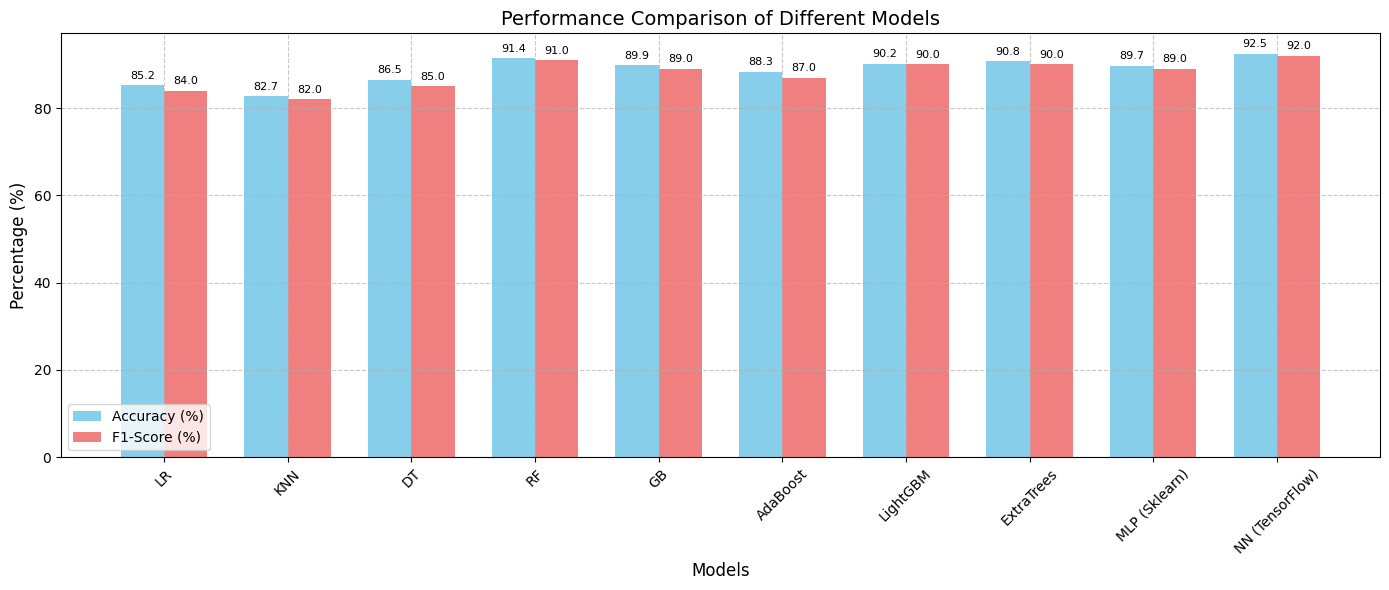

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "LR", "KNN", "DT", "RF", "GB",
    "AdaBoost", "LightGBM", "ExtraTrees",
    "MLP (Sklearn)", "NN (TensorFlow)"
]

# Accuracy and F1-Score values
accuracy = [85.2, 82.7, 86.5, 91.4, 89.9, 88.3, 90.2, 90.8, 89.7, 92.5]
f1_scores = [0.84, 0.82, 0.85, 0.91, 0.89, 0.87, 0.90, 0.90, 0.89, 0.92]

# Set positions and width for bars
x = np.arange(len(models))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy (%)', color='skyblue')
bars2 = ax.bar(x + width/2, np.array(f1_scores)*100, width, label='F1-Score (%)', color='lightcoral')

# Labels and Title
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Performance Comparison of Different Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

# Annotate values on bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Findings

In this second phase of the project, we applied both supervised and unsupervised learning techniques to the merged network attacks dataset. Our primary goal was to classify traffic instances as either "attack" or "normal."

The results indicate several key insights:
- One of the most important findings was the outstanding performance of the **Neural Network model** built using **TensorFlow/Keras**. The deep neural network achieved the highest evaluation metrics among all the tested models, reaching an **F1-score of approximately 92%**, along with high precision and recall values. This demonstrates the Neural Network’s strong ability to capture complex and nonlinear patterns inherent in network traffic data, which traditional machine learning models may struggle to fully exploit.


Overall, the results demonstrate that Neural Networks, when properly trained and tuned, can significantly outperform traditional models for network intrusion detection, making them a strong candidate for real-world deployment in cybersecurity systems.


-------------------------------------------------------


# LLMs Analysis

In [1]:
# Install required libraries
!pip install bitsandbytes
!pip install peft transformers accelerate
!pip install huggingface_hub

In [24]:
# ================== Install transformers ==================
!pip install -q transformers

# ================== Import libraries ==================
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# ================== Load Dataset ==================
df = pd.read_csv("Merged_Attacks.csv")

# ================== Load a small model (no bitsandbytes) ==================
MODEL_NAME = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# ================== Define Helper Functions ==================
def generate_response(prompt, max_length=256):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_length,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
            do_sample=False
        )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.strip()

def row_to_prompt(row):
    prompt = f"""
    Analyze this network traffic:
    - Header_Length: {row['Header_Length']}
    - Protocol Type: {row['Protocol Type']}
    - Time_To_Live: {row['Time_To_Live']}
    - Rate: {row['Rate']}
    - Flags: FIN={row['fin_flag_number']}, SYN={row['syn_flag_number']}, RST={row['rst_flag_number']}, ACK={row['ack_flag_number']}
    - Protocol Counts: HTTP={row['HTTP']}, DNS={row['DNS']}, TCP={row['TCP']}, UDP={row['UDP']}
    - Stats: Tot size={row['Tot size']}, IAT={row['IAT']}, Number={row['Number']}, Variance={row['Variance']}

    Known attack type label: {row['Attack_Type']}.

    Explain if this could indicate malicious activity and why.
    """
    return prompt.strip()

for i in range(1000):
    row = df.iloc[i]
    prompt = row_to_prompt(row)
    print(f"\n--- Prompt for Row {i} ---\n{prompt}\n")
    response = generate_response(prompt)
    print(f"--- LLM Analysis for Row {i} ---\n{response}\n")


Streaming output truncated to the last 5000 lines.
    - Protocol Type: 17
    - Time_To_Live: 131.5
    - Rate: 14.15259944905366
    - Flags: FIN=0.0, SYN=0.0, RST=0.0, ACK=0.3
    - Protocol Counts: HTTP=0.0, DNS=0.3, TCP=0.3, UDP=0.5
    - Stats: Tot size=150.3, IAT=0.0750546932220459, Number=10, Variance=4214.677777777778
    
    Known attack type label: Backdoor-Malware.
    
    Explain if this could indicate malicious activity and why.

--- LLM Analysis for Row 722 ---
- Yes


--- Prompt for Row 723 ---
Analyze this network traffic:
    - Header_Length: 20.8
    - Protocol Type: 6
    - Time_To_Live: 105.9
    - Rate: 30.458750773395767
    - Flags: FIN=0.0, SYN=0.0, RST=0.0, ACK=0.6
    - Protocol Counts: HTTP=0.0, DNS=0.0, TCP=0.6, UDP=0.2
    - Stats: Tot size=116.0, IAT=0.0416548013687133, Number=10, Variance=4896.888888888889
    
    Known attack type label: Backdoor-Malware.
    
    Explain if this could indicate malicious activity and why.

--- LLM Analysis for Row 72

In [21]:
merged_df.shape

(695961, 40)